In [1]:
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))

In [2]:
dfa = pd.read_pickle('../../data/Index Constituents/universe_with_char_and_sector.pkl')

In [3]:
dfa = dfa.reset_index()
dfa['date'] = pd.to_datetime(dfa['date'])
dfa= dfa.set_index(['ticker','date'])
df = dfa.copy()
target_indices = ['R.3000','R.1000','SP50']
test = dfa[target_indices]
for ind in target_indices:
    df=df.join(test[ind].unstack(0).apply(lambda x: x < x.shift()).astype(int).stack().rename(ind),rsuffix = '_d_flag',how='left')
    lag_d=-12
    flag_name = ind+'_d_flag'
    df = df.join(df[flag_name].unstack(0).shift(lag_d).stack().rename(ind),how = 'left',rsuffix='_d_l_flag')

df

,,SP50,R.1000,R.1000G,R.1000V,R.2000,R.2000G,R.2000V,R.3000,R.3000G,R.3000V,...,ocf_yld,int_burden,cfroic,res_mom_252d,R.3000_d_flag,R.3000_d_l_flag,R.1000_d_flag,R.1000_d_l_flag,SP50_d_flag,SP50_d_l_flag
ticker,date,,,,,,,,,,,,,,,,,,,,,
CORSQ,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,10.288486,0.991746,9.902617,-26.942434,0,0.0,0,0.0,0,0.0
MCS,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,15.476572,0.664243,10.657537,-12.963236,0,0.0,0,0.0,0,0.0
CTAS,1999-12-31,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.632066,0.923622,21.353880,-35.409958,0,0.0,0,0.0,0,0.0
HAR,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,17.334110,0.292474,20.464317,44.526463,0,0.0,0,0.0,0,0.0
BANF,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,13.144922,0.914576,17.106012,-0.888973,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEAC,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.354466,1.000000,-19.950527,116.358460,0,NaN,0,NaN,0,NaN
CBUS,2019-12-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,-14.978098,1.042677,-29.900986,-64.718796,0,NaN,0,NaN,0,NaN
APRN,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-33.604449,1.163465,-11.028030,-67.504250,0,NaN,0,NaN,0,NaN


R.3000


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['market_val'] = df_temp['market_val'].unstack().rank(method='min',ascending= False).stack()


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:53: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_impo

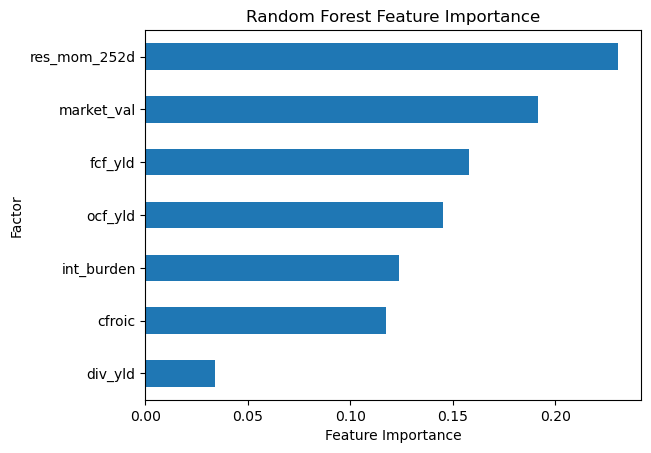

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


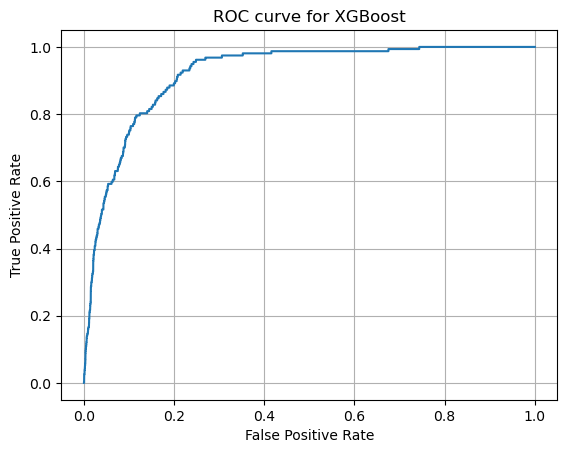

XGBoost AUC Score:  0.9212411087361005


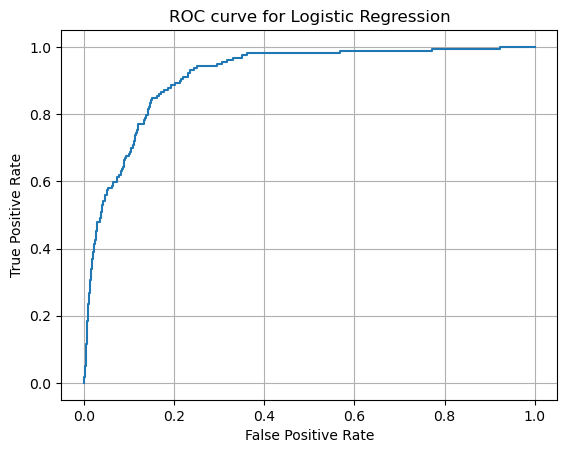

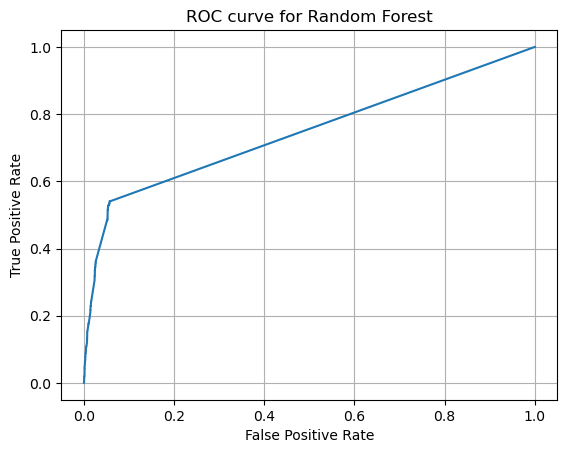

Logistic Regression AUC Score:  0.9138842131223723
Random Forest AUC Score:  0.7449625464249828


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:131: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


R.1000


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['market_val'] = df_temp['market_val'].unstack().rank(method='min',ascending= False).stack()


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:53: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_impo

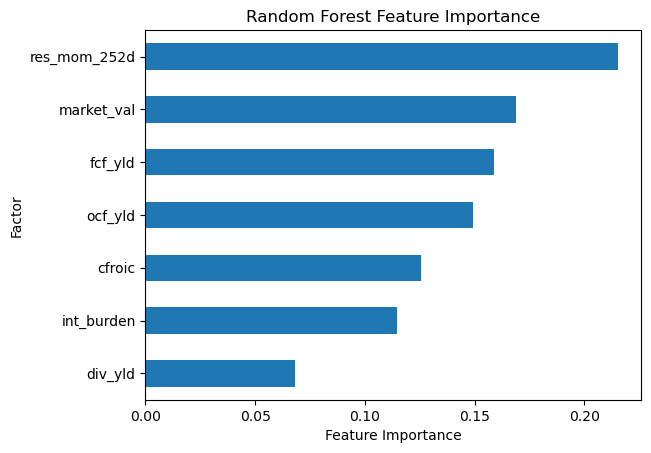

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


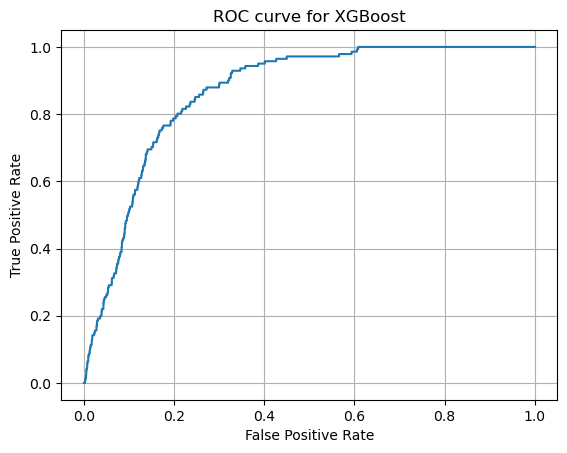

XGBoost AUC Score:  0.865229940771149


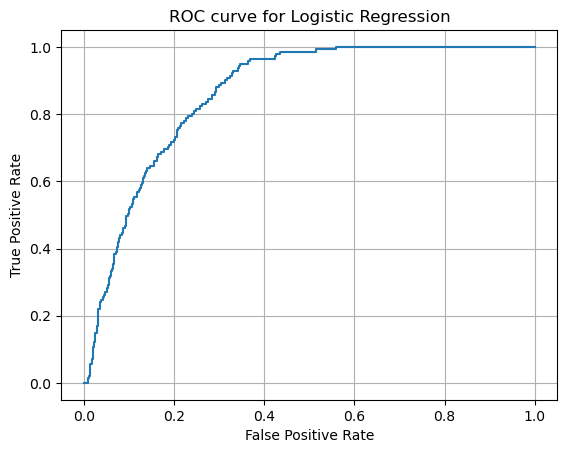

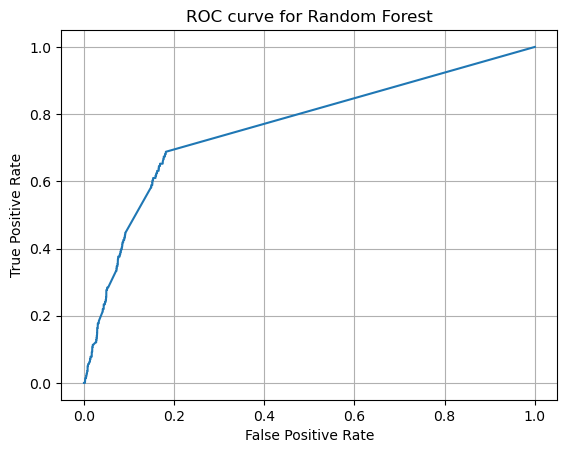

Logistic Regression AUC Score:  0.8624450141271172
Random Forest AUC Score:  0.761832702668897


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:131: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


SP50


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['market_val'] = df_temp['market_val'].unstack().rank(method='min',ascending= False).stack()


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:53: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_impo

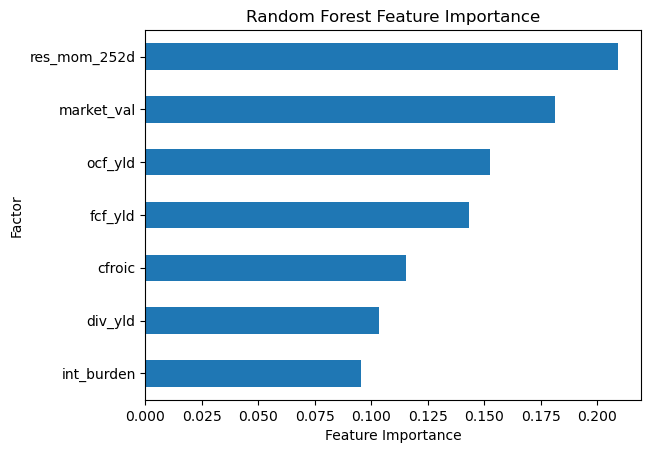

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


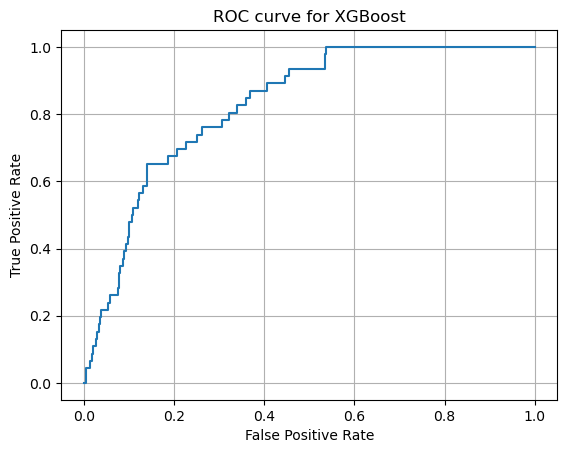

XGBoost AUC Score:  0.8270286096373053


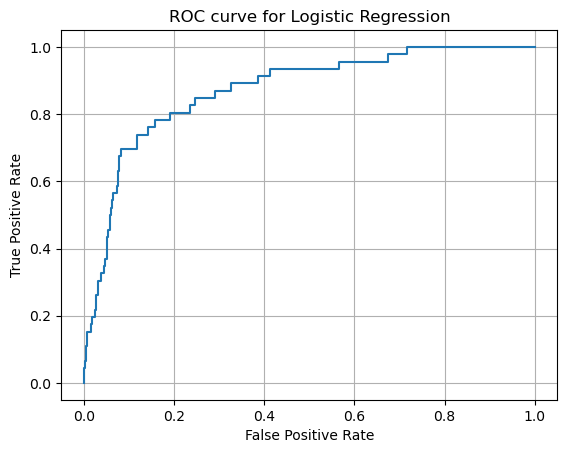

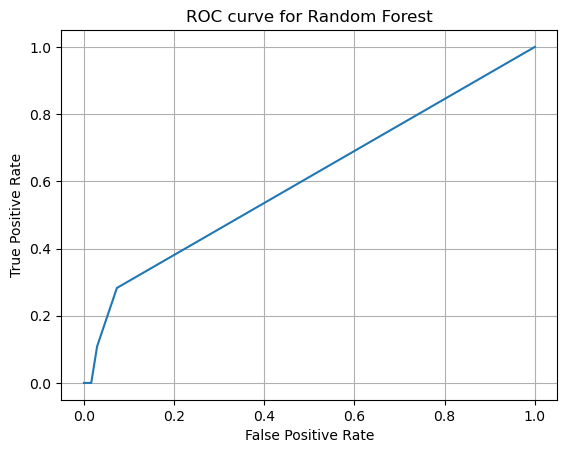

Logistic Regression AUC Score:  0.8721339916992091
Random Forest AUC Score:  0.6037376309115439


C:\Users\nurciuoli\AppData\Local\Temp\8\ipykernel_8536\1548147000.py:131: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


,,SP50,R.1000,R.1000G,R.1000V,R.2000,R.2000G,R.2000V,R.3000,R.3000G,R.3000V,...,res_mom_252d,R.3000_d_l_flag,R.3000_d_l_flag_xgb,R.3000_d_l_flag_dt,R.1000_d_l_flag,R.1000_d_l_flag_xgb,R.1000_d_l_flag_dt,SP50_d_l_flag,SP50_d_l_flag_xgb,SP50_d_l_flag_dt
ticker,date,,,,,,,,,,,,,,,,,,,,,
CORSQ,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,-26.942434,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
MCS,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,-12.963236,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
CTAS,1999-12-31,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-35.409958,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
HAR,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,44.526463,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
BANF,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,-0.888973,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEAC,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,116.358460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBUS,2019-12-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,-64.718796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APRN,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-67.504250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import accuracy_score
df_final = dfa.copy()
le = LabelEncoder()
for ind in target_indices:
    print("==========================================")
    print(ind)
    print("==========================================")
    ind_flag_d = ind+'_d_l_flag'
    df_temp = df[[ind,'market_val','fcf_yld','ocf_yld','div_yld','int_burden','cfroic','res_mom_252d',ind_flag_d]]
    df_temp['market_val'] = df_temp['market_val'].unstack().rank(method='min',ascending= False).stack()
    print("==========================================")
    df_tempf = df_temp[df_temp[ind]==1][['market_val','fcf_yld','ocf_yld','div_yld','int_burden','cfroic','res_mom_252d',ind_flag_d]]

    

    df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].fillna(df_tempf.iloc[:,1:-2].mean())
    df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].apply(lambda x: stats.mstats.winsorize(x, limits=[0.05, 0.05]))
    df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].apply(stats.zscore)
    # Specify target variable name
    target = ind_flag_d
    df_r = df_tempf.dropna()
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        df_r.drop(target, 1), 
        df_r[target], 
        test_size=0.2, 
        random_state=42)

    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # Making predictions
    y_pred = logreg.predict(X_test)

    # Random Forest Classifier
    rf = RandomForestClassifier(max_depth=25)
    rf.fit(X_train, y_train)
    # Making predictions
    y_pred_rf = rf.predict(X_test)

    rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()

    rf_s.plot(kind ='barh')

    plt.title('Random Forest Feature Importance')

    plt.xlabel('Feature Importance')

    plt.ylabel('Factor')

    plt.show()



    # Create a Decision Tree classifier and train
    dt = DecisionTreeClassifier()
    dt = dt.fit(X_train, y_train)

    # Making predictions with Decision Tree
    y_pred_dt = dt.predict(X_test)

    # Compute predicted probabilities with the Decision Tree model
    dt_probs = dt.predict_proba(X_test)[:, 1]


    # Create a XGboost classifier and train
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model = xgb_model.fit(X_train, y_train)

    # Making predictions with XGBoost
    y_pred_xgb = xgb_model.predict(X_test)

    # Compute predicted probabilities with the XGBoost model
    xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve for XGBoost
    fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
    plt.plot(fpr, tpr)
    plt.title('ROC curve for XGBoost')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

    # Compute AUC score for XGBoost
    xgb_auc = roc_auc_score(y_test, xgb_probs)
    print('XGBoost AUC Score: ', xgb_auc)

    
    # Compute predicted probabilities with the logistic regression model
    lr_probs = logreg.predict_proba(X_test)[:, 1]
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
    plt.plot(fpr, tpr)
    plt.title('ROC curve for Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

    # Compute predicted probabilities with the RandomForest model
    rf_probs = rf.predict_proba(X_test)[:, 1]
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
    plt.plot(fpr, tpr)
    plt.title('ROC curve for Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

    # Compute AUC score
    lr_auc = roc_auc_score(y_test, lr_probs)
    rf_auc = roc_auc_score(y_test, rf_probs)
    print('Logistic Regression AUC Score: ', lr_auc)
    print('Random Forest AUC Score: ', rf_auc)

    # Define training and testing split
    X = df_r.drop(target, 1).unstack().ffill().stack().dropna()
    rfp = rf.predict(X)
    df_rfp_r  =pd.DataFrame(pd.Series(rfp,index = X.index)).rename(columns={0:ind_flag_d})
    df_final = df_final.join(df_rfp_r,how='left')
    # Predicting for entire dataframe
    xgb_prediction = xgb_model.predict(X)
    df_xgb_pred = pd.DataFrame(pd.Series(xgb_prediction,index = X.index)).rename(columns={0:ind_flag_d})
    df_final = df_final.join(df_xgb_pred, how='left',rsuffix='_xgb')
    # Predicting for entire dataframe
    dt_prediction = dt.predict(X)
    df_dt_pred = pd.DataFrame(pd.Series(dt_prediction, index = X.index)).rename(columns={0: ind_flag_d})
    df_final = df_final.join(df_dt_pred, how='left',rsuffix='_dt')



df_final

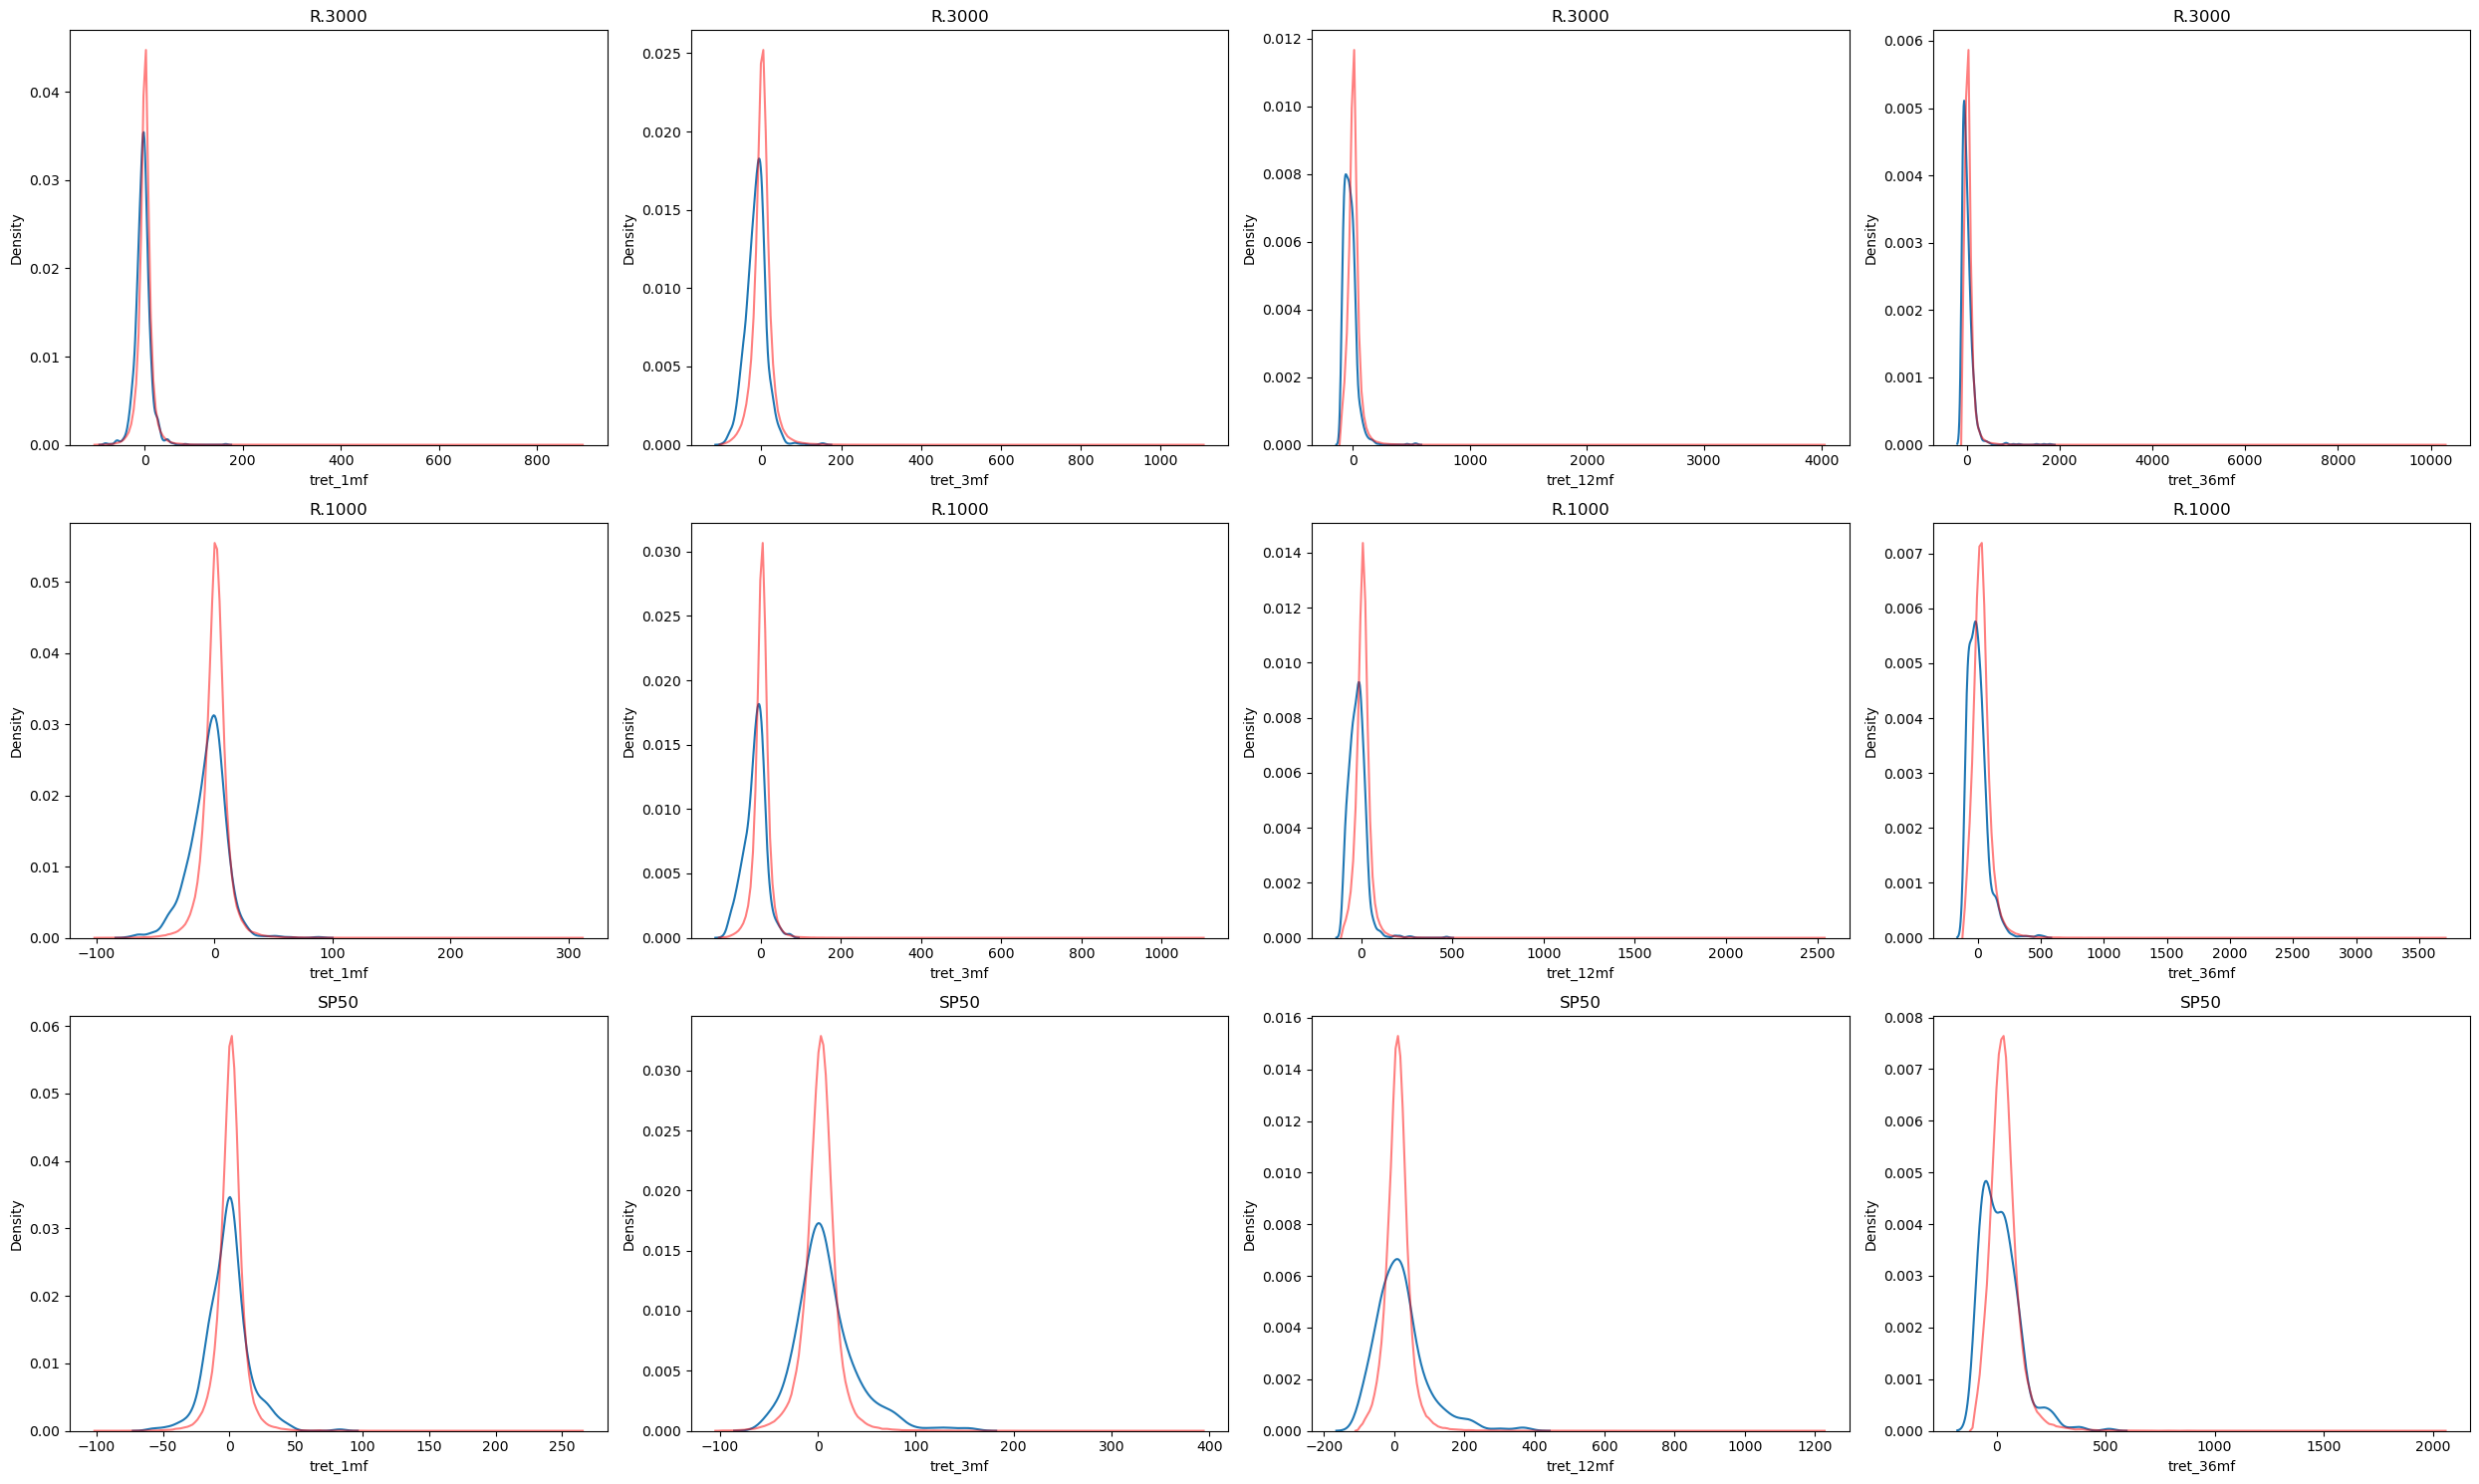

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
for x in enumerate(['R.3000','R.1000','SP50']):
    flag =x[1]+'_d_l_flag'
    df_trim = df_final[[flag,'tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
    df_ind= df[df[x[1]]==1]
    for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
        # first histogram plot
        sns.kdeplot(data=df_trim[df_trim[flag]==1], x=col[1],ax=axs[(x[0],col[0])])
        sns.kdeplot(data=df_ind, x=col[1], ax=axs[(x[0],col[0])], alpha=.50,color ='red')
        axs[(x[0],col[0])].set_title(x[1])

    plt.tight_layout()


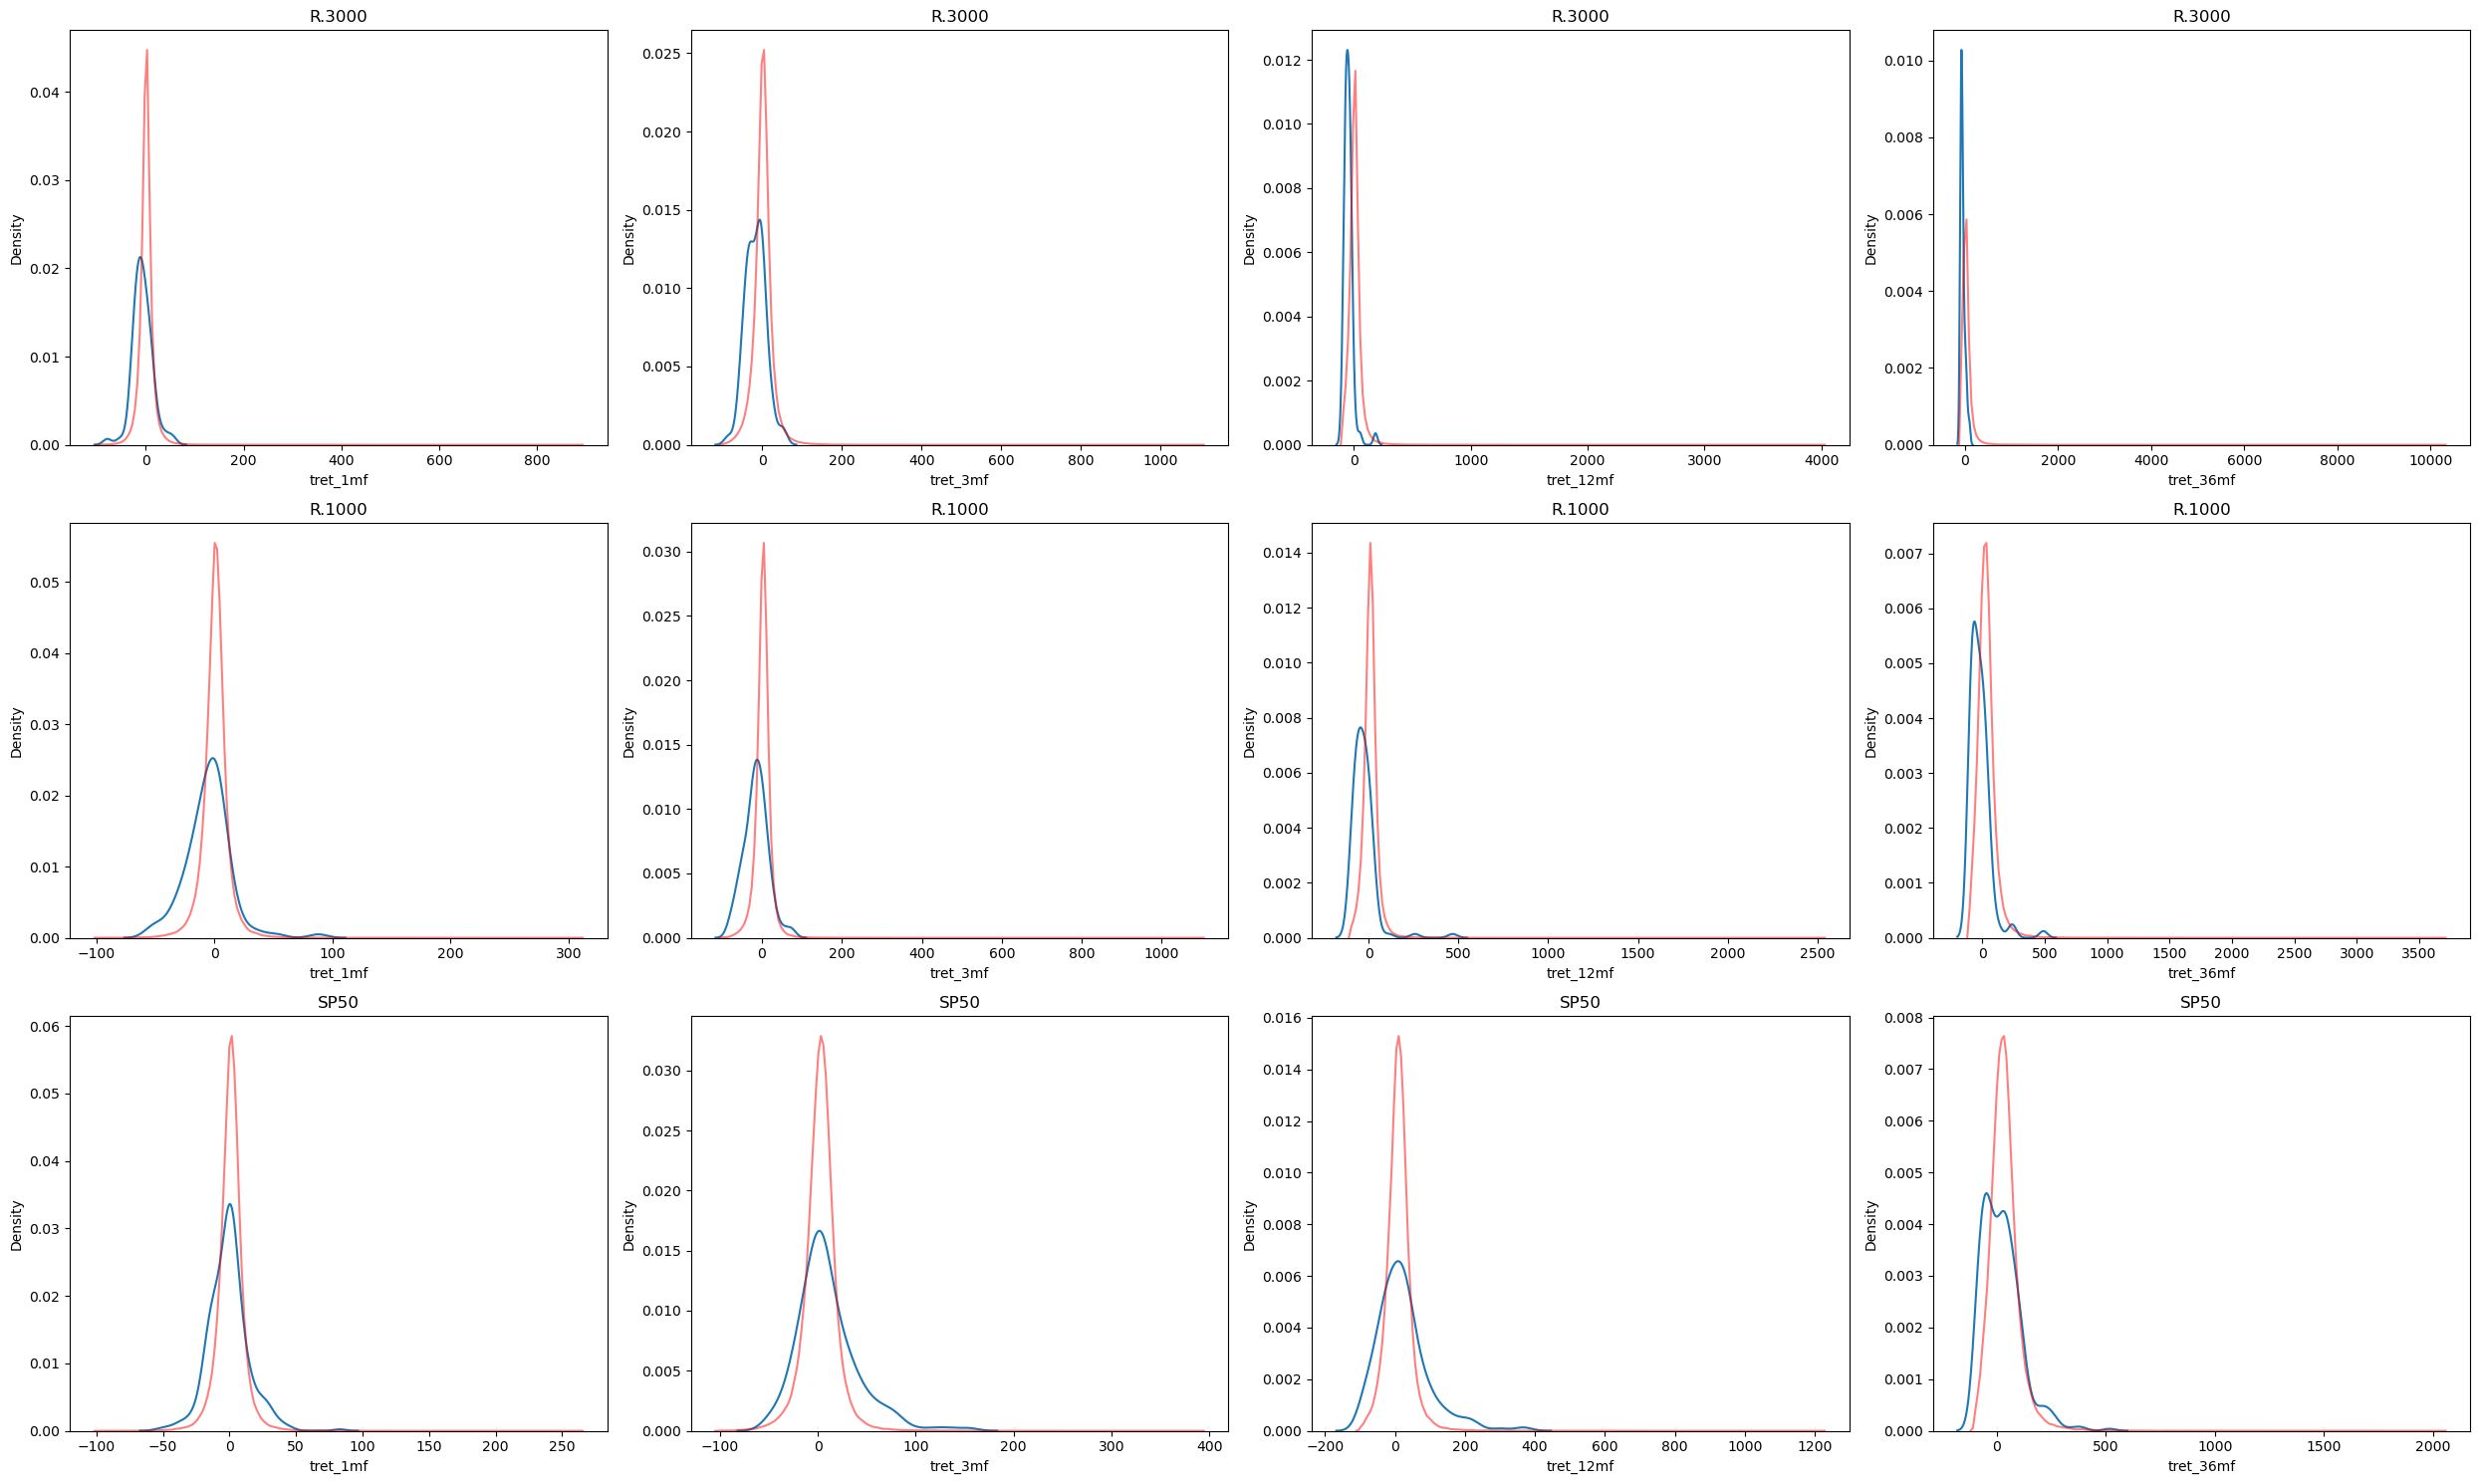

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
for x in enumerate(['R.3000','R.1000','SP50']):
    flag =x[1]+'_d_l_flag_xgb'
    df_trim = df_final[[flag,'tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
    df_ind= df[df[x[1]]==1]
    for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
        # first histogram plot
        sns.kdeplot(data=df_trim[df_trim[flag]==1], x=col[1],ax=axs[(x[0],col[0])])
        sns.kdeplot(data=df_ind, x=col[1], ax=axs[(x[0],col[0])], alpha=.50,color ='red')
        axs[(x[0],col[0])].set_title(x[1])

    plt.tight_layout()



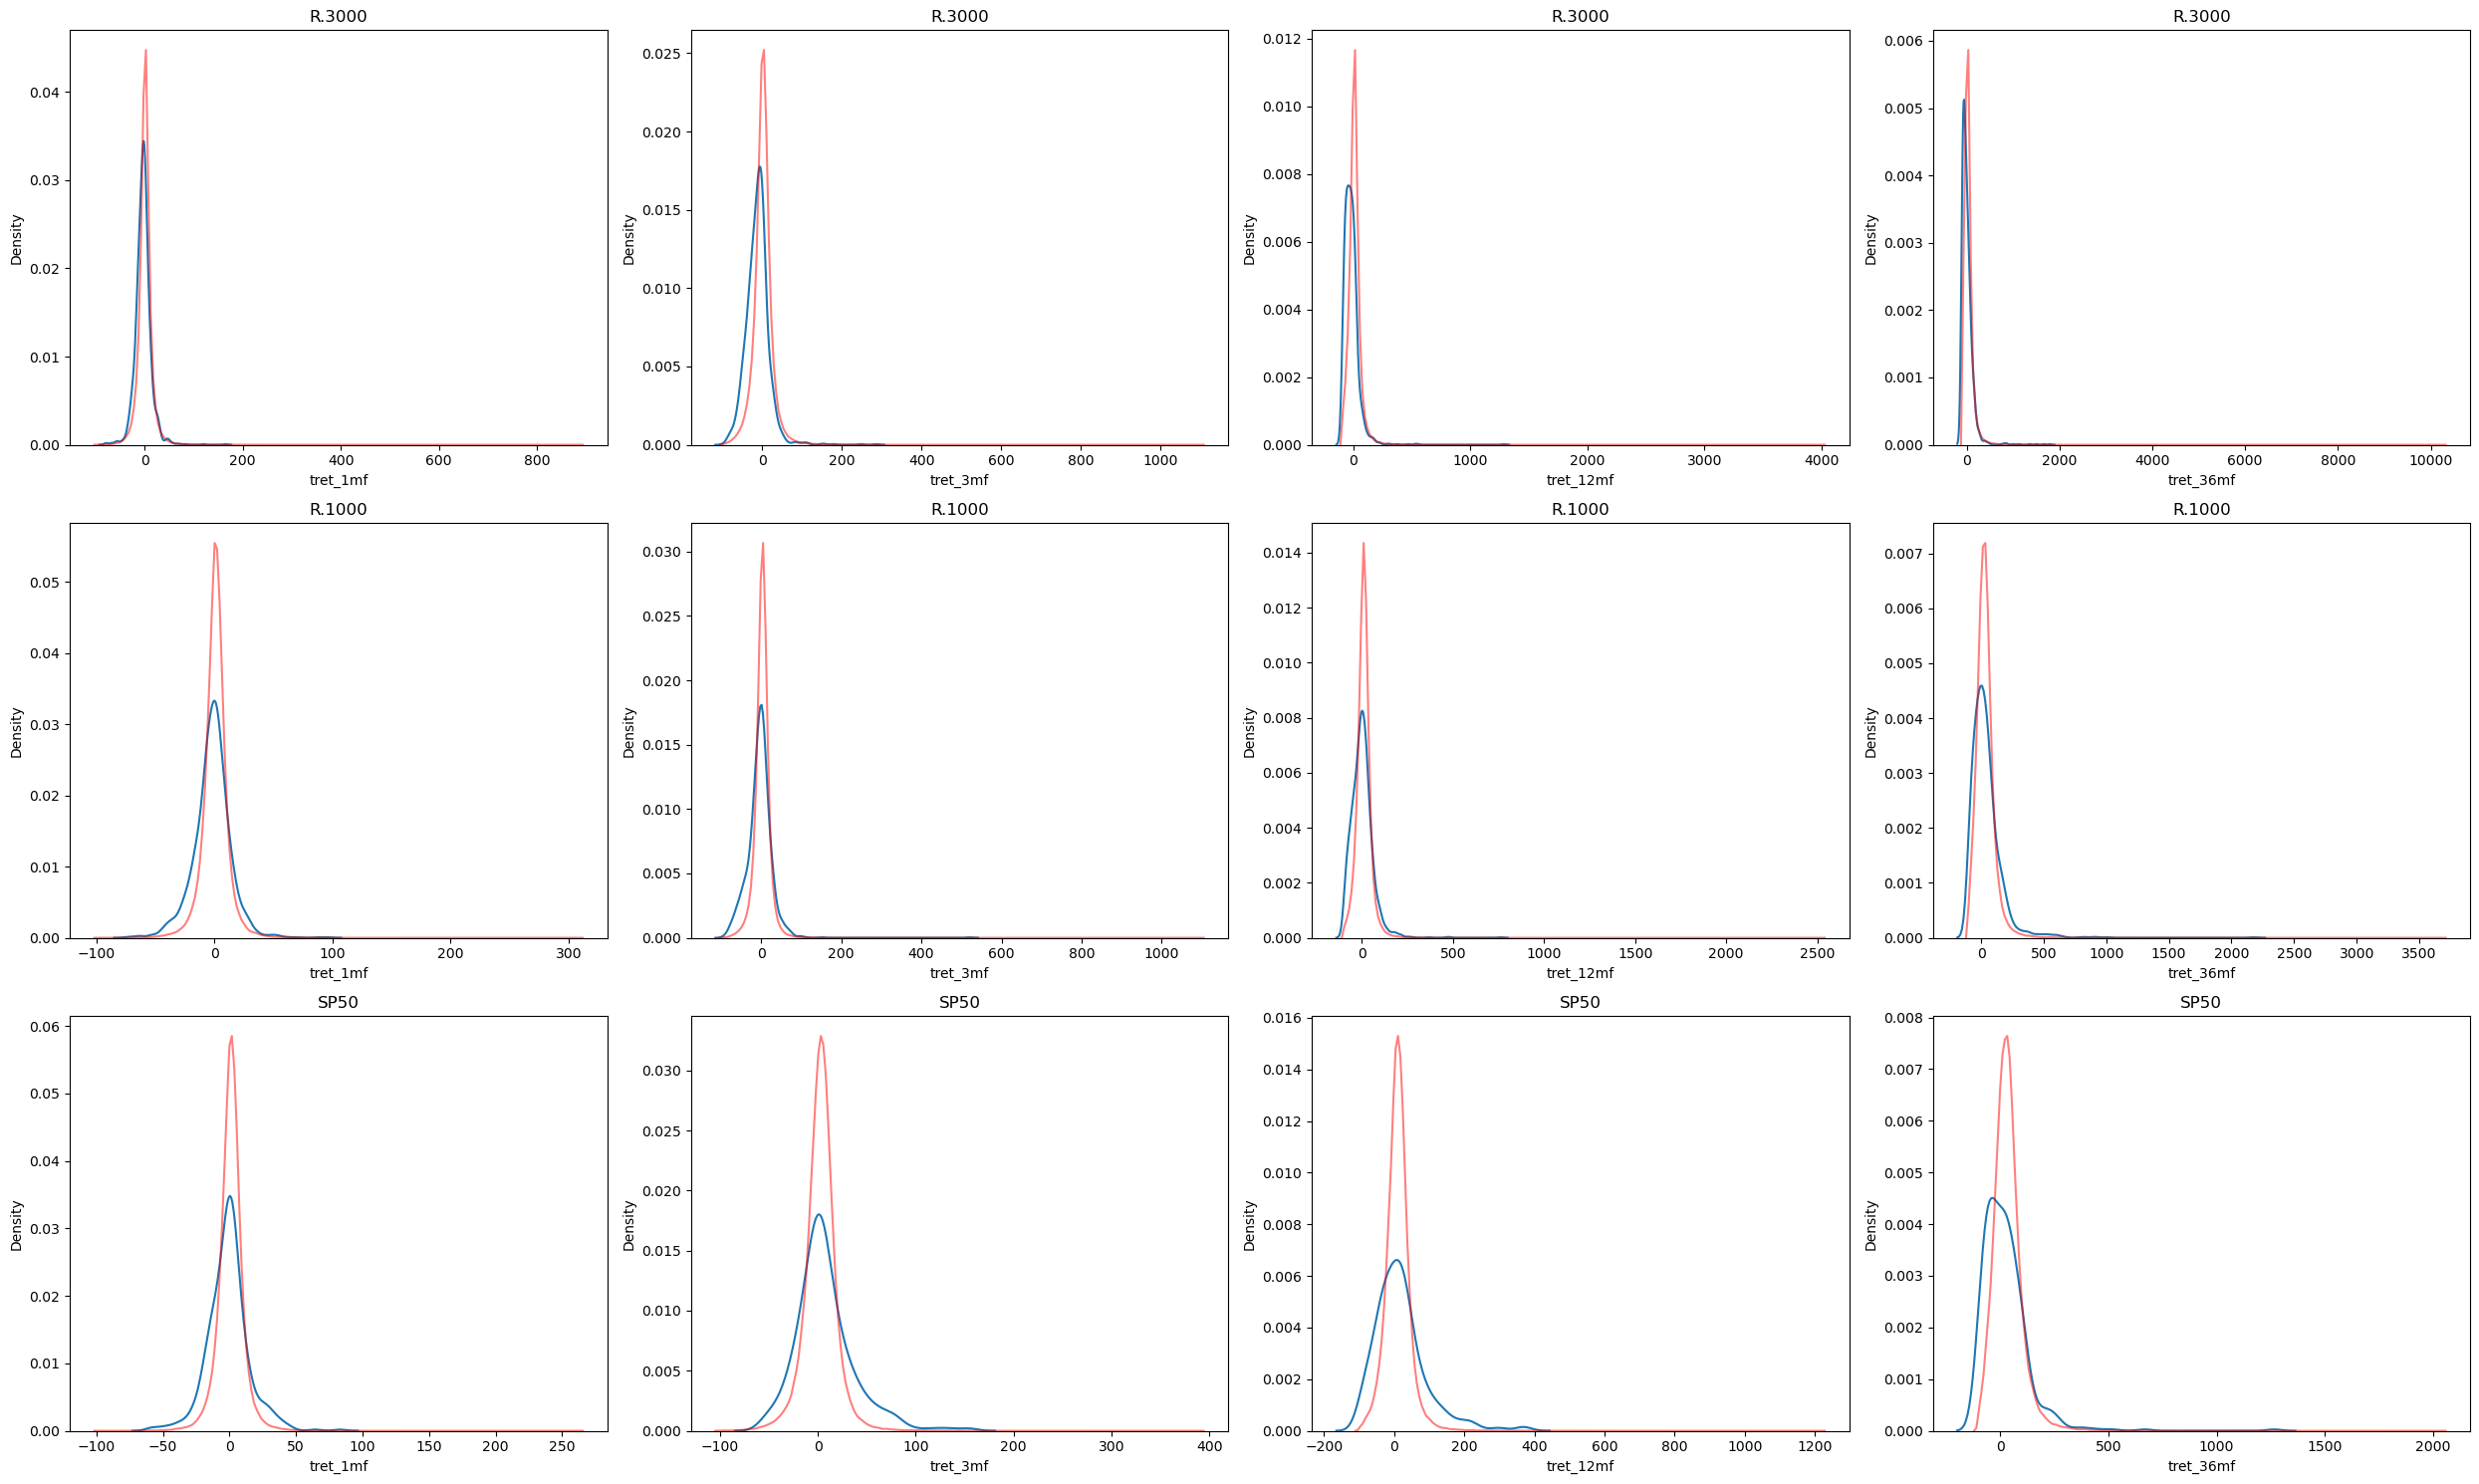

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
for x in enumerate(['R.3000','R.1000','SP50']):
    flag =x[1]+'_d_l_flag_dt'
    df_trim = df_final[[flag,'tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
    df_ind= df[df[x[1]]==1]
    for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
        # first histogram plot
        sns.kdeplot(data=df_trim[df_trim[flag]==1], x=col[1],ax=axs[(x[0],col[0])])
        sns.kdeplot(data=df_ind, x=col[1], ax=axs[(x[0],col[0])], alpha=.50,color ='red')
        axs[(x[0],col[0])].set_title(x[1])

    plt.tight_layout()